# Loading CHESS data

Scattering datasets (HKLI files) from CHESS typically come in one of two forms. The most common (updated) format is the data format used in the `nxrefine` software ([link](https://github.com/nexpy/nxrefine)), and the less common (outdated) format is the data format obtained from the old orientation matrix code used at the beamline prior to ~2023.

## Format 1: Data from nxrefine

The output file structure from nxrefine should look something like the following:
```
experimentname
└── nxrefine
    └── filename
        └── samplename
            ├── 15
            |    └── transform.nxs
            ├── 100
            |    └── transform.nxs
            ├── 300
            |    └── transform.nxs
            ├── filename_15.nxs
            ├── filename_100.nxs
            └── filename_300.nxs
``` 

The file that we are interested in loading is the .nxs file with the form `filename_15.nxs`, which holds information about the scan at _T_ = 15 K. This file has an `NXlink` which references the raw data array which is contained in the file `15/transform.nxs`. In other words, `filename_15.nxs` contains sample metadata such as the orientation matrix, temperature, ion chamber counts, etc. and the file `transform.nxs` is simply an array-like container for the pixels that make up the oriented HKLI data.

TL;DR -- we want to load the file `filename_15.nxs`, not the `transform.nxs` file.

We can accomplish that using the `load_transform()` function in `nxs_analysis_tools` as follows:

In [1]:
from nxs_analysis_tools.datareduction import load_transform

data = load_transform('example_data/nxrefine/CsV3Sb5/sample_1a/CsV3Sb5_15.nxs')

Using the `plot_slice()` function, we can now visualize various slices of reciprocal space. Here, we visualize the HK0 plane.

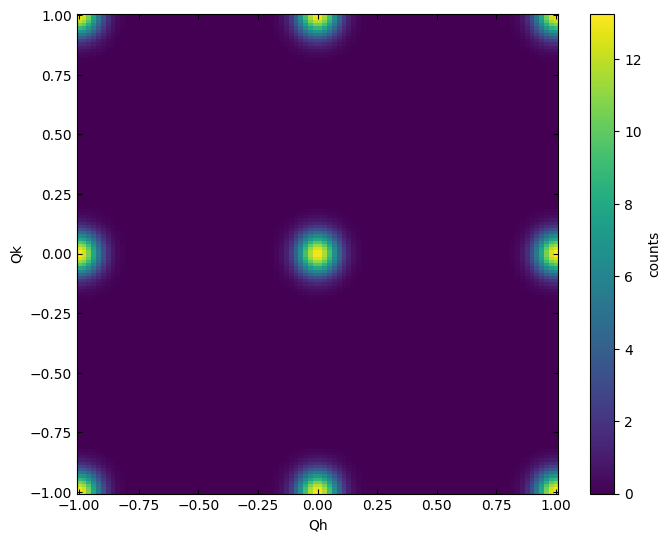

In [2]:
from nxs_analysis_tools.datareduction import plot_slice

plot_slice(data[:,:,0.0])

## Format 2: Legacy data (`3rot_hkli.nxs` files)

The output file structure from the legacy CHESS processing code looks something like:
```
experimentname
└── filename
    └── samplename
        ├── 15
        |   └── 3rot_hkli.nxs
        ├── 100
        |   └── 3rot_hkli.nxs
        └── 300
            └── 3rot_hkli.nxs
``` 

To load this data format, we can use the `load_data()` function as follows:

In [3]:
from nxs_analysis_tools.datareduction import load_data

data = load_data('example_data/sample_name/15/example_hkli.nxs')

data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)


Using the `plot_slice()` function, we can now visualize various slices of reciprocal space. Here, we visualize the HK0 plane.

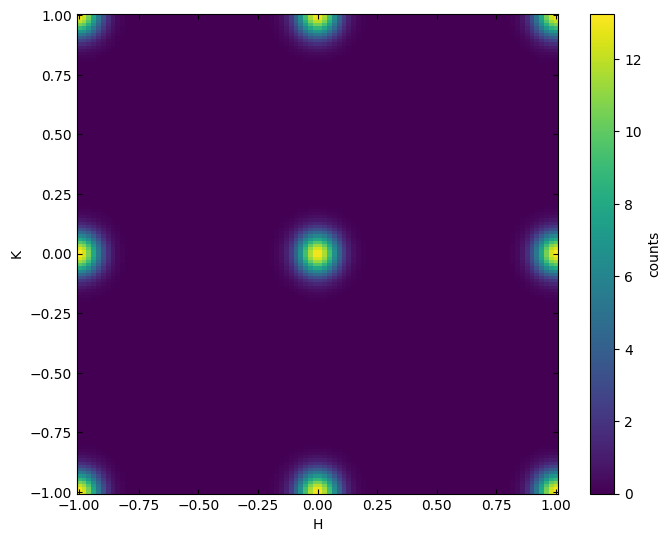

In [4]:
plot_slice(data[:,:,0.0])

For more information about visualizing data, see the example: [Visualizing data using the plot_slice function](https://nxs-analysis-tools.readthedocs.io/en/latest/examples/using_plot_slice.html)

For more information about loading an entire temperature dependence series at once, see the example: [Visualizing CHESS temperature dependent data](https://nxs-analysis-tools.readthedocs.io/en/latest/examples/working_with_chess_data.html)